<a href="https://colab.research.google.com/github/dioskit/ML-test/blob/main/titanic__solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load datasets

In [63]:
test_path = "/content/drive/MyDrive/Colab Notebooks/titanic/test.csv"
train_path = "/content/drive/MyDrive/Colab Notebooks/titanic/train.csv"

In [64]:
dftrain = pd.read_csv(train_path).copy()
dftest = pd.read_csv(test_path).copy()


# Preprocess training data

In [65]:
dftrain.dropna(inplace=True)
dftrain['Sex'] = dftrain['Sex'].map({'female': 0, 'male': 1})
dftrain['Embarked'] = dftrain['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})



# Define features and target for training


In [66]:
X = dftrain[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = dftrain['Survived']



# Split data

In [67]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Scale features

In [68]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Train model

In [69]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)


# Make predictions on the testing data
# Calculate the accuracy of the model


In [70]:
# Make predictions on the testing data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = model.score(X_test_scaled, y_test)
print('Accuracy:', accuracy)


Accuracy: 0.7297297297297297




# Preprocess test data

In [71]:
dftest['Sex'] = dftest['Sex'].map({'female': 0, 'male': 1})
dftest['Embarked'] = dftest['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


In [72]:
# Handle missing values in test data
imputer = SimpleImputer(strategy='mean')
dftest_imputed = pd.DataFrame(imputer.fit_transform(dftest[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]), columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])

# Scale test features
dftest_scaled = scaler.transform(dftest_imputed)



# Make predictions on the test data

In [73]:
dftest['Survived'] = model.predict(dftest_scaled)
dftest[dftest['Survived'] == 1]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2,1
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,NaN,1,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,NaN,0,1
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",0,23.0,1,0,21228,82.2667,B45,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,3,"Peacock, Miss. Treasteall",0,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,2,1
410,1302,3,"Naughton, Miss. Hannah",0,NaN,0,0,365237,7.7500,NaN,1,1
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,37.0,1,0,19928,90.0000,C78,1,1
412,1304,3,"Henriksson, Miss. Jenny Lovisa",0,28.0,0,0,347086,7.7750,NaN,2,1


<Axes: >

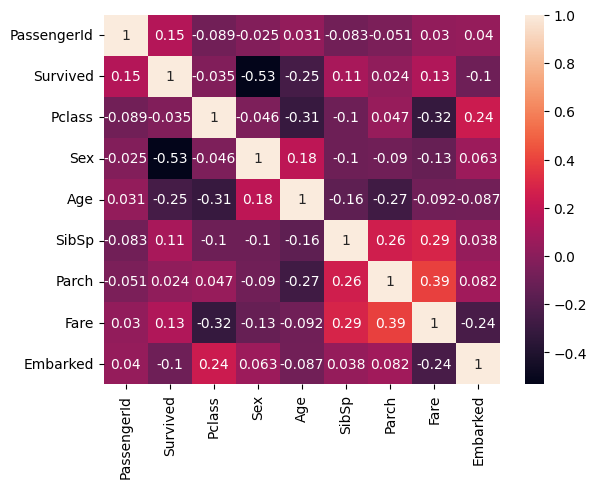

In [75]:
# Remove non-numeric columns before calculating correlation
sns.heatmap(dftrain.select_dtypes(include=np.number).corr(), annot=True)

In [81]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    int64  
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 18.6+ KB


<Axes: xlabel='Fare', ylabel='count'>

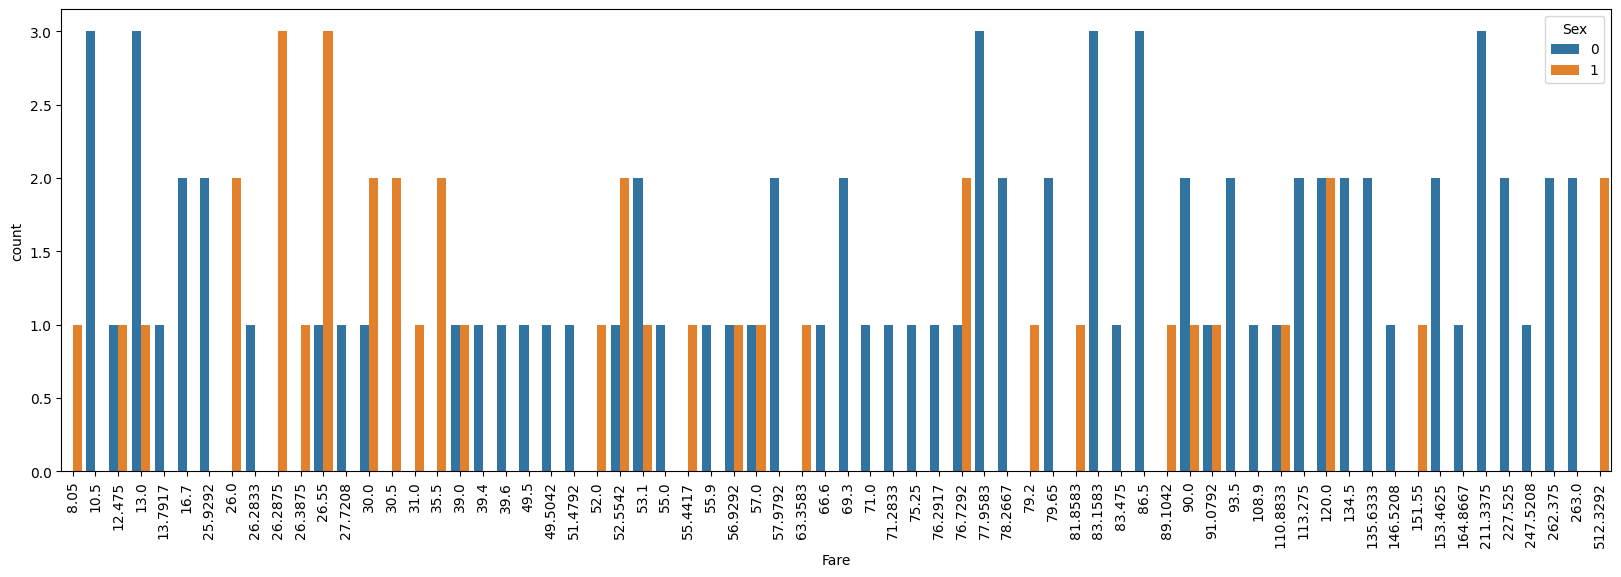

In [89]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Fare',hue='Sex',data=dftrain[dftrain['Survived'] == 1])

<Axes: xlabel='Pclass', ylabel='count'>

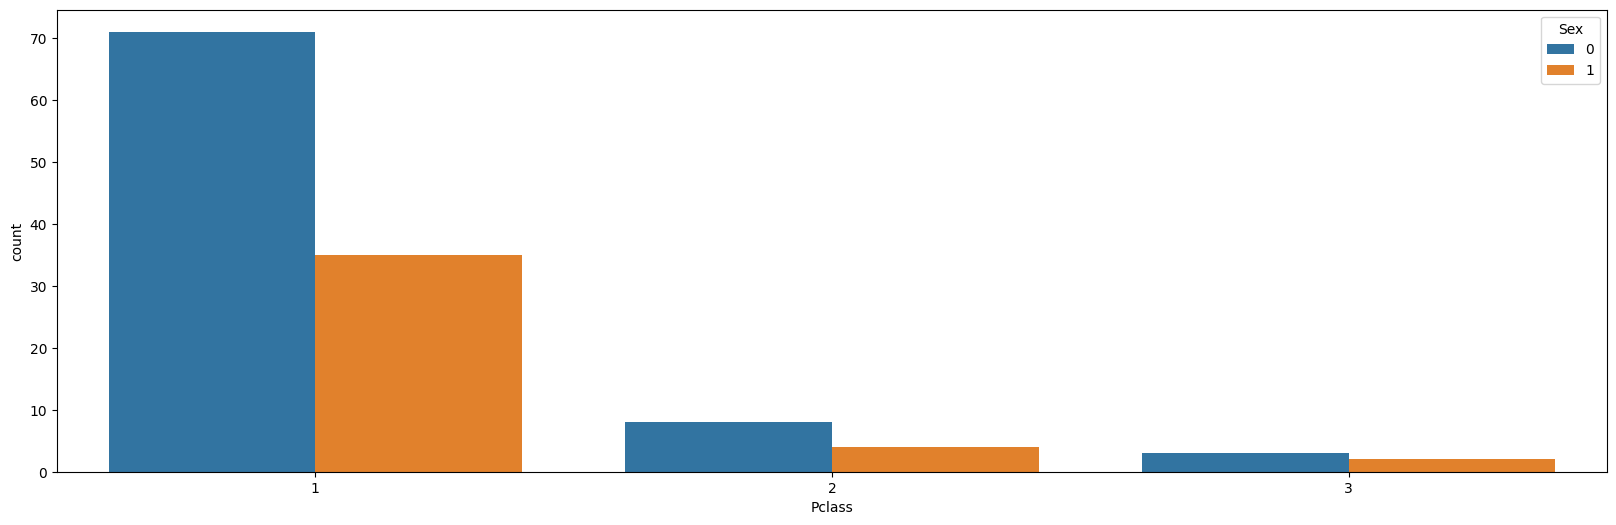

In [93]:
plt.figure(figsize=(20,6))
# plt.xticks(rotation=90)
sns.countplot(x='Pclass',hue='Sex',data=dftrain[dftrain['Survived'] == 1])

# Above plot shows that people from upper class were more saved

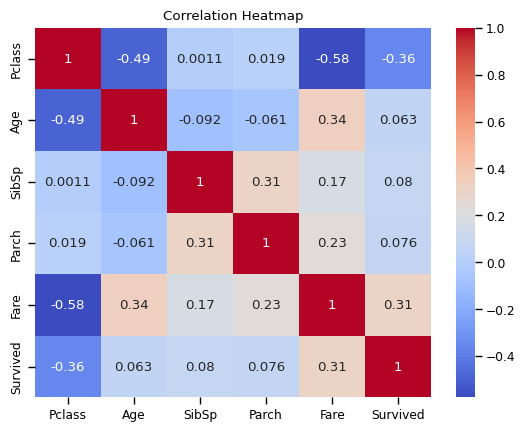

In [96]:
sns.set_context('paper')
corr = dftest[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']].corr()

# Generate heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Figure size 2000x600 with 0 Axes>

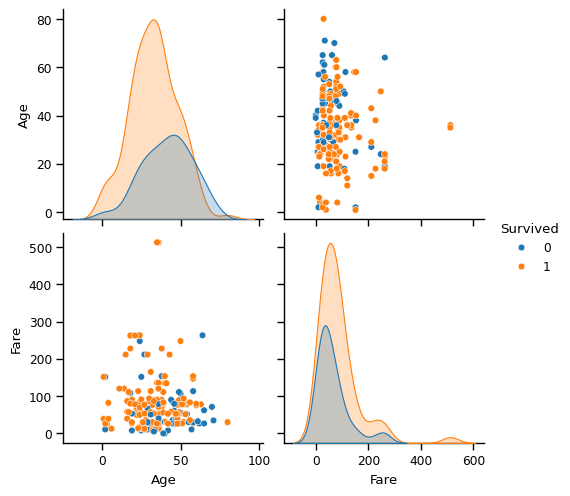

In [99]:
plt.figure(figsize=(20,6))
sns.pairplot(dftrain, hue='Survived', vars=['Age', 'Fare'])
# plt.title('Pair Plot of Age and Fare by Survival')
plt.show()